### Preprocessing (31 pts) ###

In [15]:
import pandas as pd
import numpy as np
data = pd.read_csv('GermanCredit.csv')

1. [8 pts] Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)

In [16]:
info = []
n = 3
for i in range(data.shape[1]):
    data_col = data.iloc[:, i]
    info.append([i, len(data_col[data_col == 'none'])])
del_info = sorted(info, key = lambda x:-x[1])
del_index = [x[0] for x in del_info]
data.drop(data.columns[del_index[:n]], axis = 1, inplace = True)
data
# print(data)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',4,'real estate',31,own,1,'unskilled resident',1,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',4,'life insurance',40,own,1,'high qualif/self emp/mgmt',1,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',4,car,38,own,1,skilled,1,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',4,'no known property',23,'for free',1,skilled,1,yes,bad


2. [4 pts] Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.


In [17]:
data.replace('\'', '', regex = True, inplace = True)
data
# print(data)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


3. [5 pts] The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.

In [18]:
def change_checking_status(t):
    if t == 'no checking':
        return 'No Checking'
    elif t == '<0':
        return 'Low'
    elif t == '0<=X<200':
        return 'Medium'
    elif t == '>=200':
        return 'High'
    else:
        return t

data['checking_status'] = data['checking_status'].apply(change_checking_status)
data
# print(data)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


4. [5 pts] The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').

In [35]:
def change_savings_status(t):
    if t == 'no known savings':
        return 'No Savings'
    elif t == '<100':
        return 'Low'
    elif t == '100<=X<500':
        return 'Medium'
    elif t == '500<=X<1000':
        return 'High'
    elif t == '>=1000':
        return 'High'
    else:
        return t

data['savings_status'] = data['savings_status'].apply(change_savings_status)

5. [4 pts] Change class column values from 'good' to '1' and 'bad' to '0'

In [20]:
def change_class(t):
    if t == 'good':
        return '1'
    elif t == 'bad':
        return '0'
    else:
        return t

data['class'] = data['class'].apply(change_class)
data
# print(data)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


6. [5 pts] Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.

In [21]:
def change_employment(t):
    if t == 'unemployed':
        return 'Unemployed'
    elif t == '<1':
        return 'Amateur'
    elif t == '1<=X<4':
        return 'Professional'
    elif t == '4<=X<7':
        return 'Experienced'
    elif t == '>=7':
        return 'Expert'
    else:
        return t

data['employment'] = data['employment'].apply(change_employment)
data
# print(data)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


### Analysis (17 pts) ###

1. [5 pts] Often we need to find correlations between categorical attributes, i.e. attributes that have values that fall in one of several categories, such as "yes"/"no" for attr1, or "low","medium","high" for attr2.
One such correlation is to find counts in combinations of categorial values across attributes, as in how many instances are "yes" for attr1 and "low" for attr2. A good way to find such counts is to use the Pandas crosstab (Links to an external site.) function. Do this for the following two counts.

a. [3 pts] Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).

In [22]:
pd.crosstab(data['foreign_worker'], data['class'])

class,0,1
foreign_worker,,
no,4,33
yes,296,667


b. [2 pts] Similarly, get the count of each category of employment for each category of saving_status.

In [23]:
pd.crosstab(data['employment'], data['savings_status'])

savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


2. [4 pts] Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.

In [24]:
data[data['employment'] == 'Experienced']['credit_amount'].mean()

3601.6954022988507

3. [4 pts] Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.

In [26]:
data.groupby('job')['duration'].mean()

job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64

4. [4 pts] For the purpose 'education', what is the most common checking_status and savings_status? 

In [27]:
print('Most common checking status:{}'.format(data['checking_status'].value_counts().index[0]))
print('Most common savings status:{}'.format(data['savings_status'].value_counts().index[0]))

Most common checking status:No Checking
Most common savings status:Low


### Visualization (24 pts) ###

1. [9 pts] Plot subplots of two histograms: one with savings_status on the x-axis and personal_status as different colors, and another with checking_status on the x-axis and personal_status as different colors.

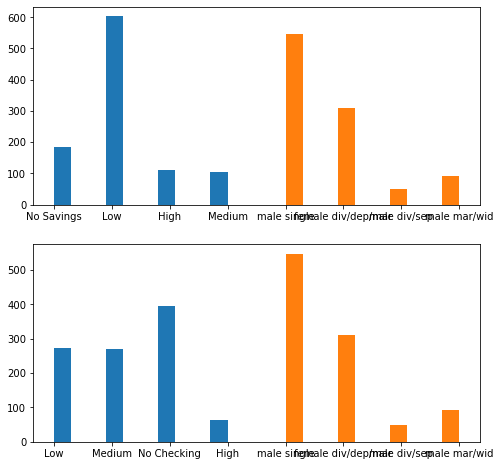

In [28]:
import matplotlib.pyplot as plt
plot_1 = data[['savings_status', 'personal_status', 'checking_status']]
plt.figure(figsize=(8, 8))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
ax1.hist(plot_1['savings_status'])
ax1.hist(plot_1['personal_status'])
ax2.hist(plot_1['checking_status'])
ax2.hist(plot_1['personal_status'])
plt.show()

2. [9 pts] For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).

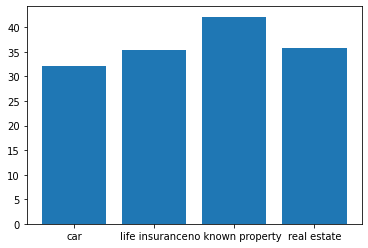

In [29]:
plot_2 = data[data['credit_amount'] > 4000][['property_magnitude', 'age']].groupby('property_magnitude').mean()
plt.bar(plot_2.index, plot_2['age'])
plt.show()

3. [6 pts] For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:
1) Personal status 
2) Credit history
3) Job


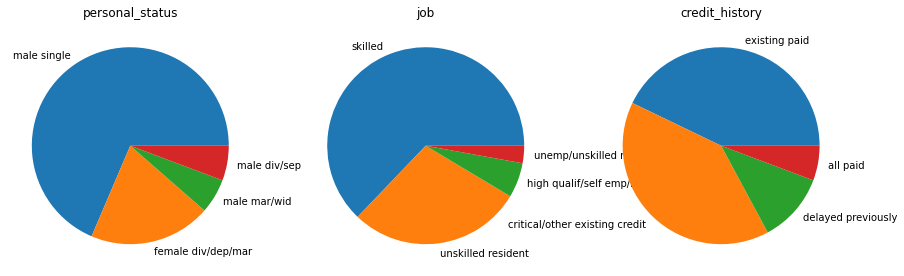

In [32]:
plot_personal_status = data[(data['savings_status'] == 'High') & (data['age'] > 40)]['personal_status']
plot_job = data[(data['savings_status'] == 'High') & (data['age'] > 40)]['job']
plot_credit_history = data[(data['savings_status'] == 'High') & (data['age'] > 40)]['credit_history']
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
ax1.pie(plot_personal_status.value_counts(), labels=plot_personal_status.value_counts().index)
ax2.pie(plot_job.value_counts(), labels=plot_job.value_counts().index)
ax3.pie(plot_credit_history.value_counts(), labels=plot_credit_history.value_counts().index)
ax1.set_title('personal_status')
ax2.set_title('job')
ax3.set_title('credit_history')
plt.show()